<div align="center">

# SOD 314
# Numerical project in Python
# Cooperative Kernel Regression
*Lucas Selini*

</div>


In [1]:
# Import all the necessary libraries
from utils.graphs import *
from utils.dgd import *
from utils.gt import *
from utils.dual import *
from utils.fct import *

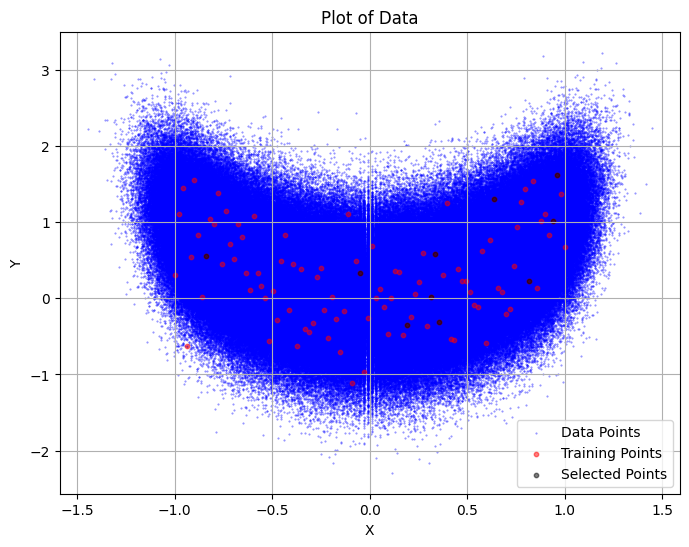

In [2]:
# Parameters
n, m, a = 100, 10, 5
sigma2 = 0.25
nu = 1

# Load data
x, y, x_n, y_n, x_selected, ind = load_plot_data('first_database', n, m, a)

In [3]:
# Generate communication graphs
line_graph=generate_graph_line(a)
cycle_graph=generate_graph_cycle(a)
small_world_graph=generate_graph_small_world(a)
fully_connected_graph = generate_graph_fully_connected(a)

## Decentralized Gradient Descent

In [ ]:
# Choose the number of iterations and the step size
n_iter = 10000
step_size = 0.002

# Compute the optimal alpha_star
K_mm = compute_kernel_matrix(x_selected, x_selected)
K_nm = compute_kernel_matrix(x_n, x_selected)
alpha_star = compute_alpha_star(K_mm, K_nm, y_n, sigma2, nu)

# Run decentralized gradient descent
optimality_gap_line,alpha_line = decentralized_gradient_descent(
    x_n, x_selected, y_n, sigma2, nu, a, n_iter, step_size, alpha_star, line_graph)
optimality_gap_cycle,alpha_cycle = decentralized_gradient_descent(
    x_n, x_selected, y_n, sigma2, nu, a, n_iter, step_size, alpha_star, cycle_graph)
optimality_gap_small_world,alpha_small_world = decentralized_gradient_descent(
    x_n, x_selected, y_n, sigma2, nu, a, n_iter, step_size, alpha_star, small_world_graph)
optimality_gap_fully_connected,alpha_fully_connected = decentralized_gradient_descent(
    x_n, x_selected, y_n, sigma2, nu, a, n_iter, step_size, alpha_star, fully_connected_graph)

In [ ]:
# Plot optimality gaps for each agent : Line Graph
plot_optimality_gaps("DGD", "Line", step_size, n_iter, optimality_gap_line)
plot_optimality_gaps("DGD", "Cycle", step_size, n_iter, optimality_gap_cycle)
plot_optimality_gaps("DGD", "Small world", step_size, n_iter, optimality_gap_small_world)
plot_optimality_gaps("DGD", "Fully Connected", step_size, n_iter, optimality_gap_fully_connected)

In [ ]:
plot_function("DGD", "Fully Connected", step_size, n_iter, alpha_fully_connected, x_selected, x_n, y_n, m, alpha_star)

## Gradient Tracking

In [ ]:
# Choose the number of iterations and the step size
n_iter = 50000
step_size = 0.001

# Compute the optimal alpha_star
K_mm = compute_kernel_matrix(x_selected, x_selected)
K_nm = compute_kernel_matrix(x_n, x_selected)
alpha_star = compute_alpha_star(K_mm, K_nm, y_n, sigma2, nu)

# Run gradient tracking
optimality_gap_line, alpha_line = gradient_tracking(
    x_n, x_selected, y_n, sigma2, nu, a, n_iter, step_size, alpha_star, line_graph)
optimality_gap_cycle, alpha_cycle = gradient_tracking(
    x_n, x_selected, y_n, sigma2, nu, a, n_iter, step_size, alpha_star, cycle_graph)   
optimality_gap_small_world,alpha_small_world = gradient_tracking(
    x_n, x_selected, y_n, sigma2, nu, a, n_iter, step_size, alpha_star, small_world_graph)
optimality_gap_fully_connected,alpha_fully_connected = gradient_tracking(
    x_n, x_selected, y_n, sigma2, nu, a, n_iter, step_size, alpha_star, fully_connected_graph)

In [ ]:
# Plot optimality gaps for each agent : Line Graph
plot_optimality_gaps("GT", "Line", step_size, n_iter, optimality_gap_line)
plot_optimality_gaps("GT", "Cycle", step_size, n_iter, optimality_gap_cycle)
plot_optimality_gaps("GT", "Small world", step_size, n_iter, optimality_gap_small_world)
plot_optimality_gaps("GT", "Fully Connected", step_size, n_iter, optimality_gap_fully_connected)

In [ ]:
plot_function("GT", "Fully Connected", step_size, n_iter, alpha_fully_connected, x_selected, x_n, y_n, m, alpha_star)

## Dual Decomposition

In [4]:
# Choose the number of iterations and the step size
n_iter = 10000
step_size = 0.1
nu = 1
# Compute the optimal alpha_star
K_mm = compute_kernel_matrix(x_selected, x_selected)
K_nm = compute_kernel_matrix(x_n, x_selected)
alpha_star = compute_alpha_star(K_mm, K_nm, y_n, sigma2, nu)

# Run dual decomposition
# optimality_gap_line, alpha_line = dual_decomposition(
#     x_n, x_selected, y_n, sigma2, nu, a, n_iter, step_size, alpha_star, line_graph)
optimality_gap_cycle, alpha_cycle = dual_decomposition(
    x_n, x_selected, y_n, sigma2, nu, a, n_iter, step_size, alpha_star, cycle_graph)   
# optimality_gap_small_world,alpha_small_world = dual_decomposition(
#     x_n, x_selected, y_n, sigma2, nu, a, n_iter, step_size, alpha_star, small_world_graph)
# optimality_gap_fully_connected,alpha_fully_connected = dual_decomposition(
#     x_n, x_selected, y_n, sigma2, nu, a, n_iter, step_size, alpha_star, fully_connected_graph)

In [ ]:
# Plot optimality gaps for each agent : Line Graph
# plot_optimality_gaps("Dual Decomposition", "Line", step_size, n_iter, optimality_gap_line)
plot_optimality_gaps("Dual Decomposition", "Cycle", step_size, n_iter, optimality_gap_cycle)
# plot_optimality_gaps("Dual Decomposition", "Small world", step_size, n_iter, optimality_gap_small_world)
# plot_optimality_gaps("Dual Decomposition", "Fully Connected", step_size, n_iter, optimality_gap_fully_connected)

In [ ]:
plot_function_dual("Dual Decomposition", "Cycle", step_size, n_iter, alpha_cycle, x_selected, x_n, y_n, m, alpha_star)